In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cmocean
import math
from matplotlib.patches import Ellipse
import pickle
import boto3
import os
import io
#for removing warnings
import warnings

# Mooring data

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
#data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path1 = 's3://velocity-u.zarr'
data_path2 = 's3://velocity-v.zarr'
data_path3 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path4 = 's3://data/modmoor_varianceII.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)
remote_files4 = fsg.glob(data_path4)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)
store4 = s3fs.S3Map(root=data_path4, s3=fsg, check=False)

du = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dzz = xr.open_zarr(store=store3, consolidated=True)
dvv = xr.open_zarr(store=store4, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
# Pickles 
credentials = open(os.path.join(os.environ['HOME'],".aws", "credentials")).read().rstrip().split("\n")
ACCESS_KEY = credentials[1].split("=")[1]
SECRET_ACCESS_KEY = credentials[2].split("=")[1]

bucket_name = 'data'
object_name = 'eof_mod_info.pickle'

s3client = boto3.client('s3'
                        ,endpoint_url = 'https://karen.uiogeo-apps.sigma2.no'
                        ,aws_access_key_id = ACCESS_KEY
                        ,aws_secret_access_key = SECRET_ACCESS_KEY
                       )

#Now to load the pickled file
response = s3client.get_object(Bucket=bucket_name, Key=object_name)

body = response['Body'].read()
data = pickle.loads(body)
#data

In [6]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')

E3 = open_s3fs('mooring_nord_svalbard/NL_E3.nc')
W3 = open_s3fs('mooring_nord_svalbard/NL_W3.nc')
E2 = open_s3fs('mooring_nord_svalbard/NL_E2.nc') 
W2 = open_s3fs('mooring_nord_svalbard/NL_W2.nc')
E1 = open_s3fs('mooring_nord_svalbard/NL_E1.nc') 
W1 = open_s3fs('mooring_nord_svalbard/NL_W1.nc') 

grid = open_s3fs('smooth_grid_karen.nc')

In [7]:
latlon = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.48733,80.03876),
          (5.56333,79.44093),
          (24.00000,81.24925),
          (18.29052,81.10979),
          (23.59853,81.30813),
          (18.23789,81.22686),
          (23.59982,81.35453),
          (18.23730,81.27356)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (923, 157), 
            (930, 149),
            (932, 147),
            (929, 142),
            (774, 344+6),
            (766, 358+6),
            (773, 346+6),
            (334, 978),
            (334, 978),
            (334, 978),
            (817, 425), # new moorings from here
            (800, 405),
            (810, 425),
            (802, 413),
            (810, 427),
            (797, 414)]
moor_vec = [np.array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
         np.array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
         np.array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
         np.array([[ 0.86834446, 0.49596158],
        [-0.49596158,  0.86834446]]),
         np.array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
         np.array([[ 0.86822067, -0.49617826],
        [ 0.49617826,  0.86822067]]),
         np.array([[ 0.76994574, -0.63810937],
        [ 0.63810937,  0.76994574]]),
         np.array([[ 0.62741291, -0.77868674],
        [-0.77868674, -0.62741291]]),
         np.array([[-0.60092325, -0.79930673],
        [-0.79930673,  0.60092325]]),
         np.array([[ 0.62481889, -0.78076972],
        [-0.78076972, -0.62481889]]),
         np.array([[ 0.76100801,  0.64874249],
        [-0.64874249,  0.76100801]]),
         np.array([[ 0.80047202,  0.59937012],
        [-0.59937012,  0.80047202]]),
         np.array([[ 0.89578352,  0.44449059],
        [-0.44449059,  0.89578352]]),
         np.array([[ 0.9975322 , -0.07021048],
        [ 0.07021048,  0.9975322 ]]),
         np.array([[ 0.9732993 , -0.22953971],
        [ 0.22953971,  0.9732993 ]]),
        np.array([[ 0.99975175, -0.0222807 ],
        [ 0.0222807 ,  0.99975175]]),
        np.array([[ 0.84114404, -0.54081116],
        [ 0.54081116,  0.84114404]]),
        np.array([[ 0.99493596,  0.10051086],
        [-0.10051086,  0.99493596]]),
         np.array([[ 0.98863153, -0.15035855],
        [ 0.15035855,  0.98863153]])]
mod_vec = [np.array([[ 0.98798697, -0.15453721],
        [ 0.15453721,  0.98798697]]), 
         np.array([[ 0.99999737, -0.00229451],
       [ 0.00229451,  0.99999737]]), 
         np.array([[ 0.99797779,  0.06356359],
       [-0.06356359,  0.99797779]]),
         np.array([[ 0.92383114, -0.38280025],
       [ 0.38280025,  0.92383114]]), 
          np.array([[-0.43408703, -0.90087094],
       [-0.90087094,  0.43408703]]), 
         np.array([[-0.09707457, -0.99527711],
       [-0.99527711,  0.09707457]]), 
         np.array([[-0.15963378, -0.9871763 ],
       [-0.9871763 ,  0.15963378]]), 
         np.array([[ 0.81018397, -0.58617568],
       [ 0.58617568,  0.81018397]]), 
         np.array([[ 0.97174756,  0.23602264],
       [-0.23602264,  0.97174756]]), 
         np.array([[ 0.84664665, -0.53215547],
       [ 0.53215547,  0.84664665]]), 
         np.array([[-0.55791922, -0.82989526],
       [-0.82989526,  0.55791922]]),
           np.array([[-0.55791922, -0.82989526],
       [-0.82989526,  0.55791922]]),
           np.array([[-0.55791922, -0.82989526],
       [-0.82989526,  0.55791922]]),
           np.array([[ 0.93938494, -0.34286431],
       [ 0.34286431,  0.93938494]]), 
        np.array([[-0.02255038, -0.99974571],
       [-0.99974571,  0.02255038]]), 
         np.array([[ 0.94740842, -0.32002701],
       [ 0.32002701,  0.94740842]]), 
         np.array([[ 0.91703214, -0.39881331],
       [ 0.39881331,  0.91703214]]), 
         np.array([[ 0.8568899 , -0.51549947],
       [ 0.51549947,  0.8568899 ]]), 
         np.array([[ 0.78953785, -0.61370187],
       [ 0.61370187,  0.78953785]])]


mo_th = [8.889956888630655, 
           0.131465823410729, 
           -3.6443820733578156, 
           22.5072445139066, 
           -115.7272141805237, 
           -95.5707357979352, 
           -99.18564037010735, 
           35.88608992933248,
           -13.6519112854629, 
           32.15120723975012, 
           -123.91201995198159,
          20.051479682548177, 
           -91.2921508730758, 
           18.66455844164398, 
           23.50401339306188, 
           31.030845867880995, 
           37.857656024733515]

c_list = ['gold', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'c', 'peru','deeppink','darkviolet','forestgreen','bisque','coral','palegreen']


In [8]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0)
v13 = d13.VCUR.fillna(0).squeeze(axis=0)
u15 = d15.UCUR.fillna(0).squeeze(axis=0)
v15 = d15.VCUR.fillna(0).squeeze(axis=0)
u17 = d17.UCUR.fillna(0).squeeze(axis=0)
v17 = d17.VCUR.fillna(0).squeeze(axis=0)

# Lofoten
ub = MB.u.isel(DEPTH=slice(19,-1)).fillna(0)
vb = MB.v.isel(DEPTH=slice(19,-1)).fillna(0)
uw = MW.u.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
vw = MW.v.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
un = MN.u.isel(DEPTH=slice(7,-1)).fillna(0)
vn = MN.v.isel(DEPTH=slice(7,-1)).fillna(0)
us = MS.u.isel(DEPTH=slice(8,-1)).fillna(0)
vs = MS.v.isel(DEPTH=slice(8,-1)).fillna(0)

# Yermark
u1 = y1.u.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
v1 = y1.v.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
u2 = y2.u.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
v2 = y2.v.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
u3 = y3.u.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)
v3 = y3.v.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u14 = ANO14.UCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
v14 = ANO14.VCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
u16 = ANO16.UCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
v16 = ANO16.VCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
u18 = ANO18.UCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
v18 = ANO18.VCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
u18 = u18.isel(BINDEPTH=slice(1,-1)).fillna(0)
v18 = v18.isel(BINDEPTH=slice(1,-1)).fillna(0)

# Nord Svalbard, DEPTH & TIME
ue1 = E1.UCUR.fillna(0)
ve1 = E1.VCUR.fillna(0)
uw1 = W1.UCUR.isel(TIME=slice(60,-1)).fillna(0)
vw1 = W1.VCUR.isel(TIME=slice(60,-1)).fillna(0)
ue2 = E2.UCUR.isel(DEPTH=slice(2,-1)).fillna(0)
ve2 = E2.VCUR.isel(DEPTH=slice(2,-1)).fillna(0)
uw2 = W2.UCUR.isel(DEPTH=slice(11,-1)).fillna(0)
vw2 = W2.VCUR.isel(DEPTH=slice(11,-1)).fillna(0)
ue3 = E3.UCUR.isel(DEPTH=slice(25,-1)).fillna(0)
ve3 = E3.VCUR.isel(DEPTH=slice(25,-1)).fillna(0)
uw3 = W3.UCUR.isel(DEPTH=slice(25,-1)).fillna(0)
vw3 = W3.VCUR.isel(DEPTH=slice(25,-1)).fillna(0)

In [9]:
vel_l = [(u13,v13),(u15,v15),(u17,v17), 
         (ub,vb),(uw,vw),(un,vn),(us,vs),
         (u1,v1),(u2,v2),(u3,v3)
         ,(u14,v14),(u16,v16),(u18,v18),
         (ue1,ve1),(uw1,vw1),(ue2,ve2),(uw2,vw2),(ue3,ve3),(uw3,vw3)]
# pickle list 
pickl = ['barents_13','barents_15','barents_17'
              ,'lofoten_basin','lofoten_west','lofoten_north','lofoten_south'
              ,'yermark_1','yermark_2','yermark_3'
              ,'beaufort_14','beaufort_16','beaufort_18'
              ,'svalbard_e1','svalbard_e2','svalbard_e3','svalbard_w1','svalbard_w2','svalbard_w3']

In [10]:
dyp = grid.depth.isel(x=slice(200,1400),y=slice(650,1800))

In [11]:
' Mooring funksjoner'
def ellipser_nDEPTH(u,v,depth):
    
    covm = np.cov(np.vstack([u.isel(nDEPTH=depth).values,v.isel(nDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])
    minor = np.sqrt(np.abs(values[1]))

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
    return major, minor, theta, vectors

def ellipser_DEPTH(u,v,depth):
    
    s = 1e2
        
    covm = np.cov(np.vstack([u.isel(DEPTH=depth).values,v.isel(DEPTH=depth).values]))
    
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

def ellipser_BINDEPTH(u,v,depth):
    
    s=100
    
    covm = np.cov(np.vstack([u.isel(BINDEPTH=depth).values,v.isel(BINDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

def tot_var_nDEPTH(u,v):
    var = np.zeros(len(u.nDEPTH))
    for i in range(len(u.nDEPTH)):
        var[i] = np.sqrt(np.var(u.isel(nDEPTH=i).values) + np.var(v.isel(nDEPTH=i).values))
    return var

def tot_var_DEPTH(u,v):
    var = np.zeros(len(u.DEPTH))
    for i in range(len(u.DEPTH)):
        var[i] = np.sqrt(np.var(u.isel(DEPTH=i).values) + np.var(v.isel(DEPTH=i).values))
    return var

def tot_var_BINDEPTH(u,v):
    var = np.zeros(len(u.BINDEPTH))
    for i in range(len(u.BINDEPTH)):
        var[i] = np.sqrt(np.var(u.isel(BINDEPTH=i).values) + np.var(v.isel(BINDEPTH=i).values))
    return var

def PCz_op_moor(up,vp,vec):
        
    p = (up*vec[0] +  vp*vec[1])/(np.sqrt(vec[0]**2 + vec[1]**2))
    o = (-up*vec[1] +  vp*vec[0])/(np.sqrt(vec[0]**2 + vec[1]**2))

    val_p, vec_p = PC(p) 
    val_o, vec_o = PC(o) 
    
    EOFp1 = (np.sqrt(val_p[0])*vec_p[:,0])
    EOFo1 = (np.sqrt(val_o[0])*vec_o[:,0])
    
    PVEp1 = int(round(val_p[0]/np.sum(val_p)*100,0))
    PVEo1 = int(round(val_o[0]/np.sum(val_o)*100,0))
    
    EOFp2 = (np.sqrt(val_p[1])*vec_p[:,1])
    EOFo2 = (np.sqrt(val_o[1])*vec_o[:,1])
    
    PVEp2 = int(round(val_p[1]/np.sum(val_p)*100,0))
    PVEo2 = int(round(val_o[1]/np.sum(val_o)*100,0))
    
    return EOFp1, EOFo1, EOFp2, EOFo2, PVEp1, PVEo1, PVEp2, PVEo2

In [12]:
'Model funksjoner'

def PC(data):
    cov = np.cov(data.T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]

    return  values, vectors

'Making a function for the vertical PC'
def PCz_op_mod(x,y, vec):
    
    d = bathym.isel(y=y, x=x).values
    up = u.isel(y=y, x=x, depth=slice(0,d-1))
    vp = v.isel(y=y, x=x, depth=slice(0,d-1))
    print(vec[0],vec[1])
    print(up.shape)
    
    vel_p = (up*vec[0] + vp*vec[1])/(np.sqrt(vec[0]**2 + vec[1]**2))
    vel_o = (-up*vec[1] + vp*vec[0])/(np.sqrt(vec[0]**2 + vec[1]**2))
    
    valp, vecp = PC(vel_p)
    valo, veco = PC(vel_o)
    
    PCAp1 = (np.sqrt(valp[0])*vecp[:,0])
    PCAo1 = (np.sqrt(valo[0])*veco[:,0])
    
    PVEp1 = int(round(valp[0]/np.sum(valp)*100,0))
    PVEo1 = int(round(valo[0]/np.sum(valo)*100,0))
    
    PCAp2 = (np.sqrt(valp[0])*vecp[:,0])
    PCAo2 = (np.sqrt(valo[0])*veco[:,0])
    
    PVEp2 = int(round(valp[0]/np.sum(valp)*100,0))
    PVEo2 = int(round(valo[0]/np.sum(valo)*100,0))
    
    return PCAp1, PCAo1, PCAp2, PCAo2, up, vp, PVEp1, PVEo1, PVEp2, PVEo2

def ellipse_mod(x,y,d):
    
    #d = bathym.isel(y=y, x=x).values
    covm = np.cov(np.vstack([u.isel(x=x, y=y, depth=d).values,v.isel(x=x, y=y, depth=d).values]))
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    
    # ellipser :
    major = np.sqrt(values[0])
    minor = np.sqrt(np.abs(values[1]))
    
    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
    
    return major, minor, theta, vectors

In [13]:
u = du.vozocrtx.isel(x=slice(200,1400),y=slice(650,1800))
u = u.rename({'depthu' : 'depth'})
v = dv.vomecrty.isel(x=slice(200,1400),y=slice(650,1800))
v = v.rename({'depthv' : 'depth'})

bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

## Barents sea

0
mooring all days done
1
mooring all days done
2
mooring all days done


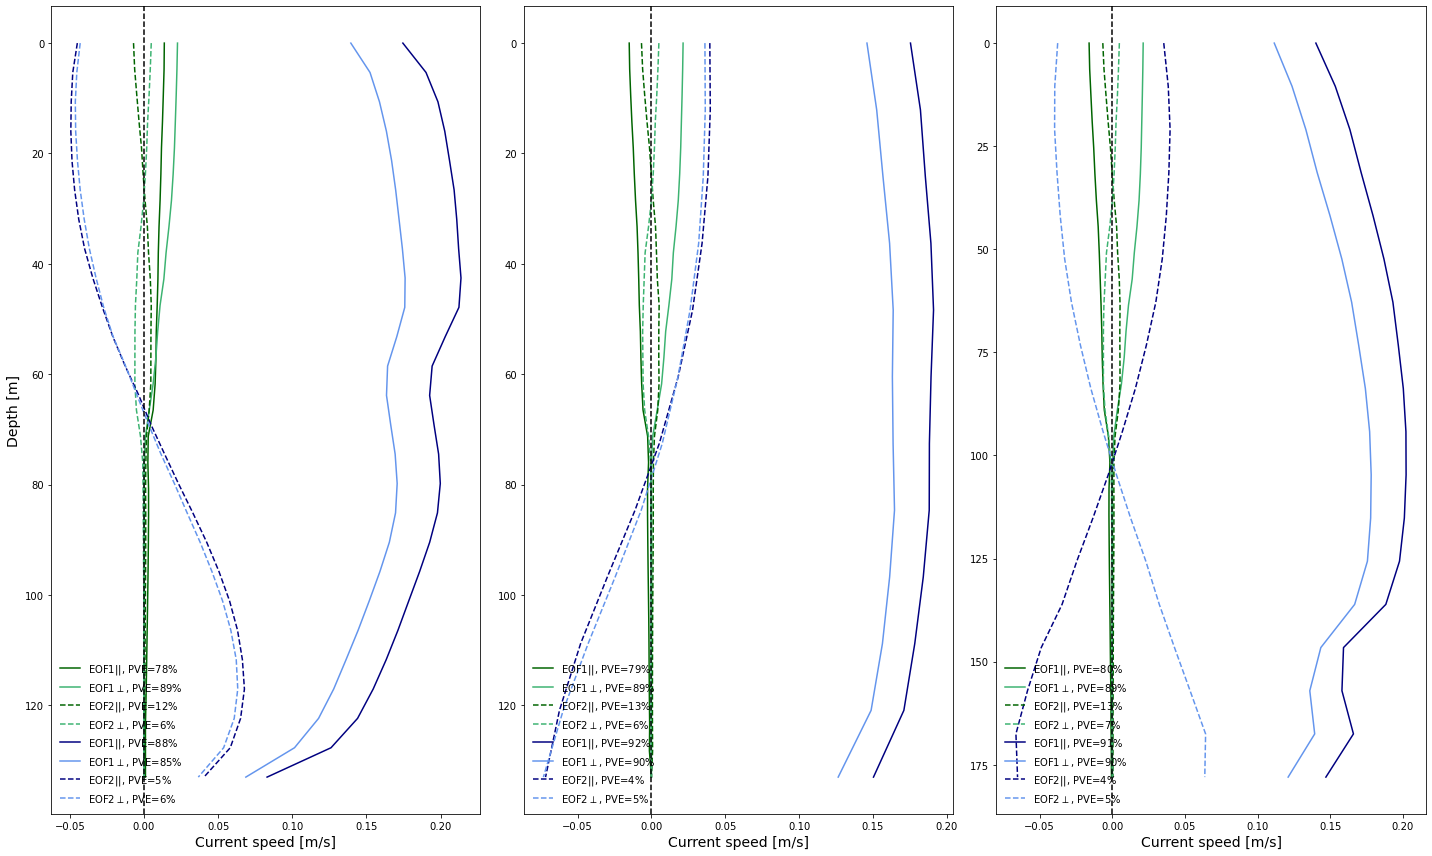

In [74]:
fig, axs = plt.subplots(1,3,figsize=(20,12))
#plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Barents Sea ', horizontalalignment='center', fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, nr in zip(axs.flat, [0,1,2], [133,133,178]):
    print(i)
    
    # Mooring, alle dager
    U = vel_l[i][0]*10**(-2)
    V = vel_l[i][1]*10**(-2)
    vec_mr = moor_vec[i][:,0]
    EOFp1, EOFo1, EOFp2, EOFo2, PVEp1, PVEo1, PVEp2, PVEo2 = PCz_op_moor(U,V,vec_mr)
    print('mooring all days done')
    
    # Getting the acctual depth for location:
    d = bathym.isel(x=x,y=y).values-1
    dyp_mr = np.linspace(0,nr,len(U.nDEPTH))
    dyp_mo = np.linspace(0,nr,d)
    
    # Model infrmation
    PCAp1 = data[pickl[i]]['EOF1p'][:d]
    PCAo1 = data[pickl[i]]['EOF1o'][:d]
    PCAp2 = data[pickl[i]]['EOF2p'][:d]
    PCAo2 = data[pickl[i]]['EOF2o'][:d]
    PVEmp1 = data[pickl[i]]['PVE1p']
    PVEmo1 = data[pickl[i]]['PVE1o']
    PVEmp2 = data[pickl[i]]['PVE2p']
    PVEmo2 = data[pickl[i]]['PVE2o']

# --------------------------------------------------------------------------------------------------------------------
    
    # Plotting EOF mod, GREEEN
    axs.plot(PCAp1,dyp_mo, label= f'EOF1$||$, PVE={PVEmp1}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo1,dyp_mo, label= f'EOF1$\perp$, PVE={PVEmo1}%', color='mediumseagreen')  
    axs.plot(PCAp2,dyp_mo, linestyle='--', label= f'EOF2$||$, PVE={PVEmp2}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo2,dyp_mo, linestyle='--', label= f'EOF2$\perp$, PVE={PVEmo2}%', color='mediumseagreen')  
    
    # Plotting EOF moor, BLUE
    axs.plot(EOFp1,dyp_mr, label= f'EOF1$||$, PVE={PVEp1}%', color='navy')
    axs.plot(EOFo1,dyp_mr, label= f'EOF1$\perp$, PVE={PVEo1}%', color='cornflowerblue')
    axs.plot(EOFp2,dyp_mr, linestyle='--', label= f'EOF2$||$, PVE={PVEp2}%', color='navy')
    axs.plot(EOFo2,dyp_mr, linestyle='--', label= f'EOF2$\perp$, PVE={PVEo2}%', color='cornflowerblue')
    
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 

fig.tight_layout()

plt.savefig('EOF1og2_barents.pdf', dpi = 300)

3


<ipython-input-11-9c9aa322ec0a>:93: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  PVEp1 = int(round(val_p[0]/np.sum(val_p)*100,0))
<ipython-input-11-9c9aa322ec0a>:93: ComplexWarning: Casting complex values to real discards the imaginary part
  PVEp1 = int(round(val_p[0]/np.sum(val_p)*100,0))
<ipython-input-11-9c9aa322ec0a>:94: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  PVEo1 = int(round(val_o[0]/np.sum(val_o)*100,0))
<ipython-input-11-9c9aa322ec0a>:94: ComplexWarning: Casting complex values to real discards the imaginary part
  PVEo1 = int(round(val_o[0]/np.sum(val_o)*100,0))
<ipython-input-11-9c9aa322ec0a>:99: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a

mooring all days done


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4


<ipython-input-11-9c9aa322ec0a>:93: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  PVEp1 = int(round(val_p[0]/np.sum(val_p)*100,0))
<ipython-input-11-9c9aa322ec0a>:93: ComplexWarning: Casting complex values to real discards the imaginary part
  PVEp1 = int(round(val_p[0]/np.sum(val_p)*100,0))
<ipython-input-11-9c9aa322ec0a>:94: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a future release. Use `np.round` or `scalar.round` instead.
  PVEo1 = int(round(val_o[0]/np.sum(val_o)*100,0))
<ipython-input-11-9c9aa322ec0a>:94: ComplexWarning: Casting complex values to real discards the imaginary part
  PVEo1 = int(round(val_o[0]/np.sum(val_o)*100,0))
<ipython-input-11-9c9aa322ec0a>:99: DeprecationWarning: The Python built-in `round` is deprecated for complex scalars, and will raise a `TypeError` in a

mooring all days done


/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


5
mooring all days done
6
mooring all days done


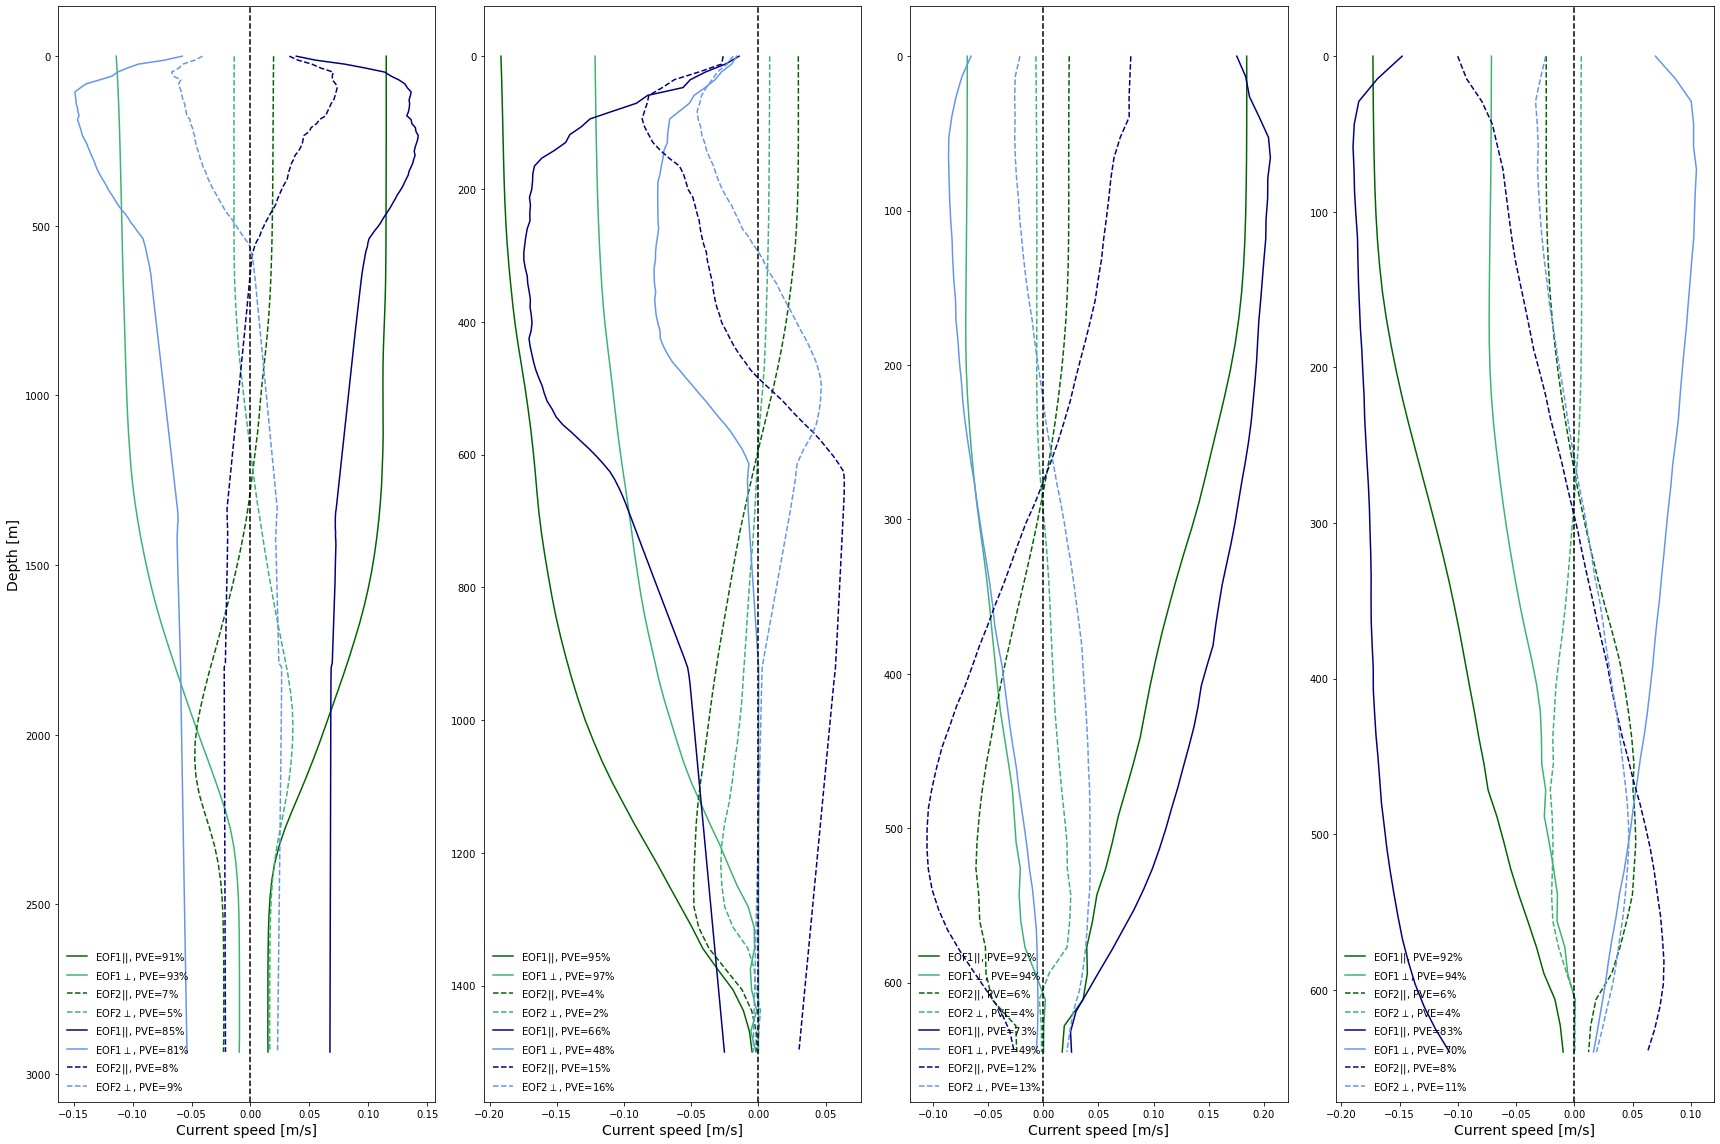

In [14]:
fig, axs = plt.subplots(1,4,figsize=(24,12))
#plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Barents Sea ', horizontalalignment='center', fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, nr in zip(axs.flat, [3,4,5,6], [2935,1500,645,640]):
    print(i)
    
    # Mooring, alle dager
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec_mr = moor_vec[i][:,0]
    EOFp1, EOFo1, EOFp2, EOFo2, PVEp1, PVEo1, PVEp2, PVEo2 = PCz_op_moor(U,V,vec_mr)
    print('mooring all days done')
    
    # Getting the acctual depth for location:
    x = moor_l[i][0]
    y = moor_l[i][1]
    d = bathym.isel(x=x,y=y).values-1
    dyp_mr = np.linspace(0,nr,len(U.DEPTH))
    dyp_mo = np.linspace(0,nr,d)
    
    # Model infrmation
    PCAp1 = data[pickl[i]]['EOF1p'][:d]
    PCAo1 = data[pickl[i]]['EOF1o'][:d]
    PCAp2 = data[pickl[i]]['EOF2p'][:d]
    PCAo2 = data[pickl[i]]['EOF2o'][:d]
    PVEmp1 = data[pickl[i]]['PVE1p']
    PVEmo1 = data[pickl[i]]['PVE1o']
    PVEmp2 = data[pickl[i]]['PVE2p']
    PVEmo2 = data[pickl[i]]['PVE2o']

# --------------------------------------------------------------------------------------------------------------------
    
    # Plotting EOF mod, GREEEN
    axs.plot(PCAp1,dyp_mo, label= f'EOF1$||$, PVE={PVEmp1}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo1,dyp_mo, label= f'EOF1$\perp$, PVE={PVEmo1}%', color='mediumseagreen')  
    axs.plot(PCAp2,dyp_mo, linestyle='--', label= f'EOF2$||$, PVE={PVEmp2}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo2,dyp_mo, linestyle='--', label= f'EOF2$\perp$, PVE={PVEmo2}%', color='mediumseagreen')  
    
    # Plotting EOF moor, BLUE
    axs.plot(EOFp1,dyp_mr, label= f'EOF1$||$, PVE={PVEp1}%', color='navy')
    axs.plot(EOFo1,dyp_mr, label= f'EOF1$\perp$, PVE={PVEo1}%', color='cornflowerblue')
    axs.plot(EOFp2,dyp_mr, linestyle='--', label= f'EOF2$||$, PVE={PVEp2}%', color='navy')
    axs.plot(EOFo2,dyp_mr, linestyle='--', label= f'EOF2$\perp$, PVE={PVEo2}%', color='cornflowerblue')
    
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 

fig.tight_layout()

plt.savefig('EOF1og2_lofoten.pdf', dpi = 300)

7
mooring all days done
9
mooring all days done
8
mooring all days done


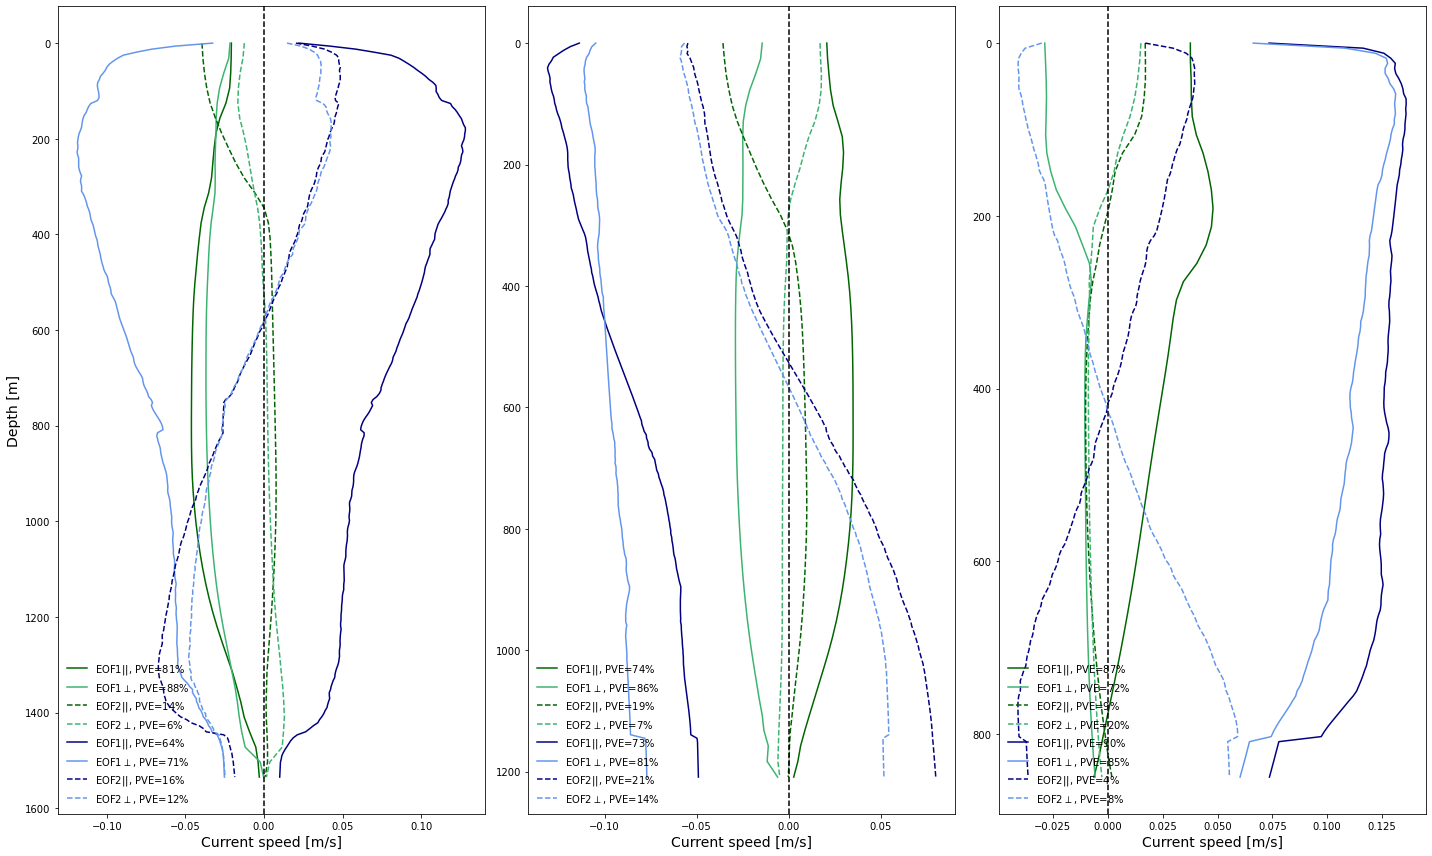

In [17]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,3,figsize=(20,12))
#plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Barents Sea ', horizontalalignment='center', fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, nr in zip(axs.flat, [7,9,8], [1535,1209,850]):
    print(i)
    
    # Mooring, alle dager
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec_mr = moor_vec[i][:,0]
    EOFp1, EOFo1, EOFp2, EOFo2, PVEp1, PVEo1, PVEp2, PVEo2 = PCz_op_moor(U.T,V.T,vec_mr)
    print('mooring all days done')
    
    # Getting the acctual depth for location:
    x = moor_l[i][0]
    y = moor_l[i][1]
    d = bathym.isel(x=x,y=y).values-1
    dyp_mr = np.linspace(0,nr,len(U.DEPTH))
    dyp_mo = np.linspace(0,nr,d)
    
    # Model infrmation
    PCAp1 = data[pickl[i]]['EOF1p'][:d]
    PCAo1 = data[pickl[i]]['EOF1o'][:d]
    PCAp2 = data[pickl[i]]['EOF2p'][:d]
    PCAo2 = data[pickl[i]]['EOF2o'][:d]
    PVEmp1 = data[pickl[i]]['PVE1p']
    PVEmo1 = data[pickl[i]]['PVE1o']
    PVEmp2 = data[pickl[i]]['PVE2p']
    PVEmo2 = data[pickl[i]]['PVE2o']

# --------------------------------------------------------------------------------------------------------------------
    
    # Plotting EOF mod, GREEEN
    axs.plot(PCAp1,dyp_mo, label= f'EOF1$||$, PVE={PVEmp1}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo1,dyp_mo, label= f'EOF1$\perp$, PVE={PVEmo1}%', color='mediumseagreen')  
    axs.plot(PCAp2,dyp_mo, linestyle='--', label= f'EOF2$||$, PVE={PVEmp2}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo2,dyp_mo, linestyle='--', label= f'EOF2$\perp$, PVE={PVEmo2}%', color='mediumseagreen')  
    
    # Plotting EOF moor, BLUE
    axs.plot(EOFp1,dyp_mr, label= f'EOF1$||$, PVE={PVEp1}%', color='navy')
    axs.plot(EOFo1,dyp_mr, label= f'EOF1$\perp$, PVE={PVEo1}%', color='cornflowerblue')
    axs.plot(EOFp2,dyp_mr, linestyle='--', label= f'EOF2$||$, PVE={PVEp2}%', color='navy')
    axs.plot(EOFo2,dyp_mr, linestyle='--', label= f'EOF2$\perp$, PVE={PVEo2}%', color='cornflowerblue')
    
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 

fig.tight_layout()

plt.savefig('EOF1og2_Yermark.pdf', dpi = 300)

10
mooring all days done
11
mooring all days done
12
mooring all days done


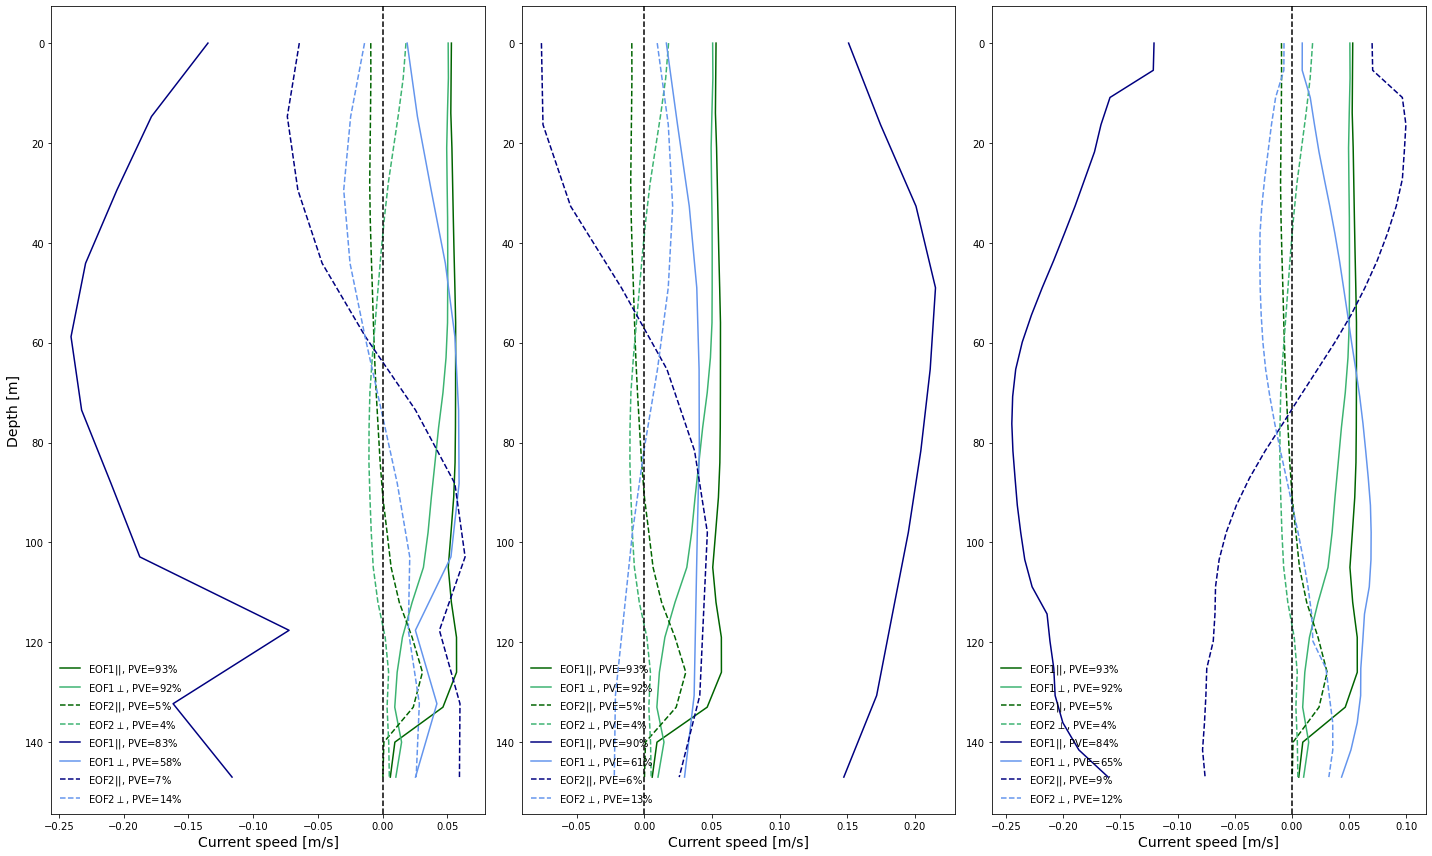

In [16]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,3,figsize=(20,12))
#plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Barents Sea ', horizontalalignment='center', fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, nr in zip(axs.flat, [10,11,12], [147,147,147]):
    print(i)
    
    # Mooring, alle dager
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec_mr = moor_vec[i][:,0]
    EOFp1, EOFo1, EOFp2, EOFo2, PVEp1, PVEo1, PVEp2, PVEo2 = PCz_op_moor(U,V,vec_mr)
    print('mooring all days done')
    
    # Getting the acctual depth for location:
    x = moor_l[i][0]
    y = moor_l[i][1]
    d = bathym.isel(x=x,y=y).values-1
    dyp_mr = np.linspace(0,nr,len(U.BINDEPTH))
    dyp_mo = np.linspace(0,nr,d)
    
    # Model infrmation
    PCAp1 = data[pickl[i]]['EOF1p'][:d]
    PCAo1 = data[pickl[i]]['EOF1o'][:d]
    PCAp2 = data[pickl[i]]['EOF2p'][:d]
    PCAo2 = data[pickl[i]]['EOF2o'][:d]
    PVEmp1 = data[pickl[i]]['PVE1p']
    PVEmo1 = data[pickl[i]]['PVE1o']
    PVEmp2 = data[pickl[i]]['PVE2p']
    PVEmo2 = data[pickl[i]]['PVE2o']

# --------------------------------------------------------------------------------------------------------------------
    
    # Plotting EOF mod, GREEEN
    axs.plot(PCAp1,dyp_mo, label= f'EOF1$||$, PVE={PVEmp1}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo1,dyp_mo, label= f'EOF1$\perp$, PVE={PVEmo1}%', color='mediumseagreen')  
    axs.plot(PCAp2,dyp_mo, linestyle='--', label= f'EOF2$||$, PVE={PVEmp2}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo2,dyp_mo, linestyle='--', label= f'EOF2$\perp$, PVE={PVEmo2}%', color='mediumseagreen')  
    
    # Plotting EOF moor, BLUE
    axs.plot(EOFp1,dyp_mr, label= f'EOF1$||$, PVE={PVEp1}%', color='navy')
    axs.plot(EOFo1,dyp_mr, label= f'EOF1$\perp$, PVE={PVEo1}%', color='cornflowerblue')
    axs.plot(EOFp2,dyp_mr, linestyle='--', label= f'EOF2$||$, PVE={PVEp2}%', color='navy')
    axs.plot(EOFo2,dyp_mr, linestyle='--', label= f'EOF2$\perp$, PVE={PVEo2}%', color='cornflowerblue')
    
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 

fig.tight_layout()

plt.savefig('EOF1og2_beaufort.pdf', dpi = 300)

18
mooring all days done
17
mooring all days done
16
mooring all days done
15
mooring all days done
14
mooring all days done
13
mooring all days done


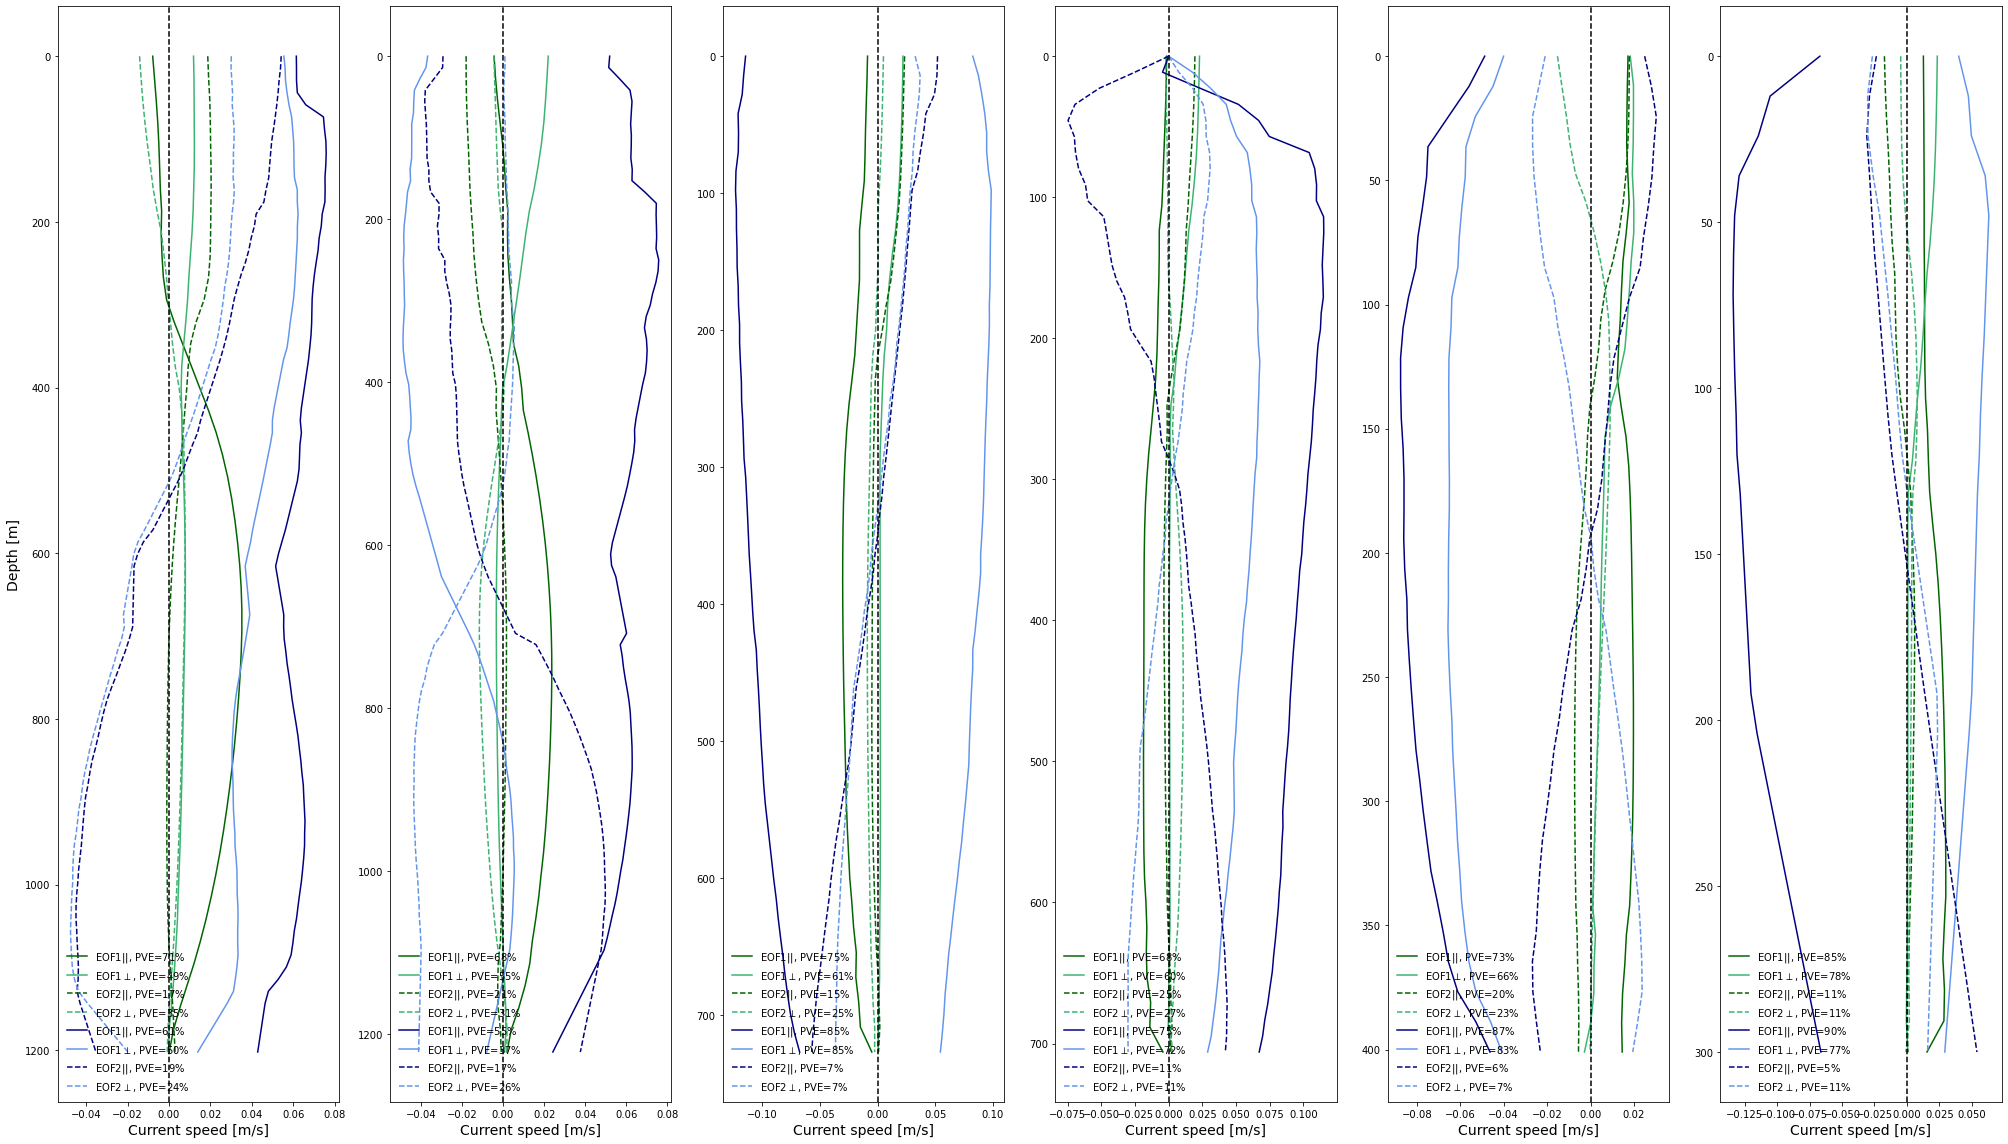

In [18]:
fig, axs = plt.subplots(1,6,figsize=(28,16))
#plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Barents Sea ', horizontalalignment='center', fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i, nr in zip(axs.flat,[18,17,16,15,14,13], [1202,1222,727,706,401,300]):
    print(i)
    
    # Mooring, alle dager
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec_mr = moor_vec[i][:,0]
    EOFp1, EOFo1, EOFp2, EOFo2, PVEp1, PVEo1, PVEp2, PVEo2 = PCz_op_moor(U,V,vec_mr)
    print('mooring all days done')
    
    # Getting the acctual depth for location:
    x = moor_l[i][0]
    y = moor_l[i][1]
    d = bathym.isel(x=x,y=y).values-1
    dyp_mr = np.linspace(0,nr,len(U.DEPTH))
    dyp_mo = np.linspace(0,nr,d)
    
    # Model infrmation
    PCAp1 = data[pickl[i]]['EOF1p'][:d]
    PCAo1 = data[pickl[i]]['EOF1o'][:d]
    PCAp2 = data[pickl[i]]['EOF2p'][:d]
    PCAo2 = data[pickl[i]]['EOF2o'][:d]
    PVEmp1 = data[pickl[i]]['PVE1p']
    PVEmo1 = data[pickl[i]]['PVE1o']
    PVEmp2 = data[pickl[i]]['PVE2p']
    PVEmo2 = data[pickl[i]]['PVE2o']

# --------------------------------------------------------------------------------------------------------------------
    
    # Plotting EOF mod, GREEEN
    axs.plot(PCAp1,dyp_mo, label= f'EOF1$||$, PVE={PVEmp1}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo1,dyp_mo, label= f'EOF1$\perp$, PVE={PVEmo1}%', color='mediumseagreen')  
    axs.plot(PCAp2,dyp_mo, linestyle='--', label= f'EOF2$||$, PVE={PVEmp2}%', color='darkgreen')  # linestyle='--',
    axs.plot(PCAo2,dyp_mo, linestyle='--', label= f'EOF2$\perp$, PVE={PVEmo2}%', color='mediumseagreen')  
    
    # Plotting EOF moor, BLUE
    axs.plot(EOFp1,dyp_mr, label= f'EOF1$||$, PVE={PVEp1}%', color='navy')
    axs.plot(EOFo1,dyp_mr, label= f'EOF1$\perp$, PVE={PVEo1}%', color='cornflowerblue')
    axs.plot(EOFp2,dyp_mr, linestyle='--', label= f'EOF2$||$, PVE={PVEp2}%', color='navy')
    axs.plot(EOFo2,dyp_mr, linestyle='--', label= f'EOF2$\perp$, PVE={PVEo2}%', color='cornflowerblue')
    
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 

fig.tight_layout()

plt.savefig('EOF1og2_Nsvarbard.pdf', dpi = 300)